# Disease prediction through symptoms

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


```Here, the symptoms count are varying for the diseases. For making the data workable, we have to convert the string values to numeric labels for each unique symptom.```

In [3]:
symptoms = set()
for s in df.columns[1:]:
    symptoms.update(df[s].unique())

symptoms_list = list(symptoms) 
symptoms_list
    

[' restlessness',
 nan,
 ' irritability',
 ' nodal_skin_eruptions',
 ' high_fever',
 ' swollen_legs',
 ' stomach_bleeding',
 ' excessive_hunger',
 ' pain_behind_the_eyes',
 ' muscle_wasting',
 ' blackheads',
 ' extra_marital_contacts',
 ' belly_pain',
 ' receiving_unsterile_injections',
 ' neck_pain',
 ' abdominal_pain',
 ' enlarged_thyroid',
 ' nausea',
 ' distention_of_abdomen',
 ' irritation_in_anus',
 ' dark_urine',
 ' blood_in_sputum',
 ' weight_loss',
 ' cramps',
 ' chest_pain',
 ' red_spots_over_body',
 'itching',
 ' bladder_discomfort',
 ' blister',
 ' obesity',
 ' bruising',
 ' muscle_weakness',
 ' skin_peeling',
 ' swelled_lymph_nodes',
 ' runny_nose',
 ' continuous_feel_of_urine',
 ' pain_in_anal_region',
 ' history_of_alcohol_consumption',
 ' acute_liver_failure',
 ' mood_swings',
 ' visual_disturbances',
 ' throat_irritation',
 ' scurring',
 ' sunken_eyes',
 ' inflammatory_nails',
 ' passage_of_gases',
 ' fast_heart_rate',
 ' swollen_blood_vessels',
 ' palpitations',
 ' ab

In [4]:
symptoms_list.remove(np.NAN)

In [5]:
df.groupby(df.columns[0]).count().head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Unnamed: 0,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0
AIDS,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Acne,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,120,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0
Allergy,120,120,120,72,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
processed_df = pd.DataFrame(columns=[*symptoms_list,'disease'])
processed_df

,restlessness,irritability,nodal_skin_eruptions,high_fever,swollen_legs,stomach_bleeding,excessive_hunger,pain_behind_the_eyes,muscle_wasting,blackheads,...,dehydration,loss_of_balance,family_history,brittle_nails,skin_rash,pain_during_bowel_movements,swelling_joints,continuous_sneezing,watering_from_eyes,disease


In [7]:
processed_df = pd.DataFrame(columns=[*symptoms_list,'disease'])
for i in range(len(df)):
    processed_df.loc[i] = [*[1 if s in df.iloc[i].values else 0 for s in symptoms_list],df.iloc[i][0]]

In [8]:
processed_df.head()

,restlessness,irritability,nodal_skin_eruptions,high_fever,swollen_legs,stomach_bleeding,excessive_hunger,pain_behind_the_eyes,muscle_wasting,blackheads,...,dehydration,loss_of_balance,family_history,brittle_nails,skin_rash,pain_during_bowel_movements,swelling_joints,continuous_sneezing,watering_from_eyes,disease
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fungal infection


<AxesSubplot:>

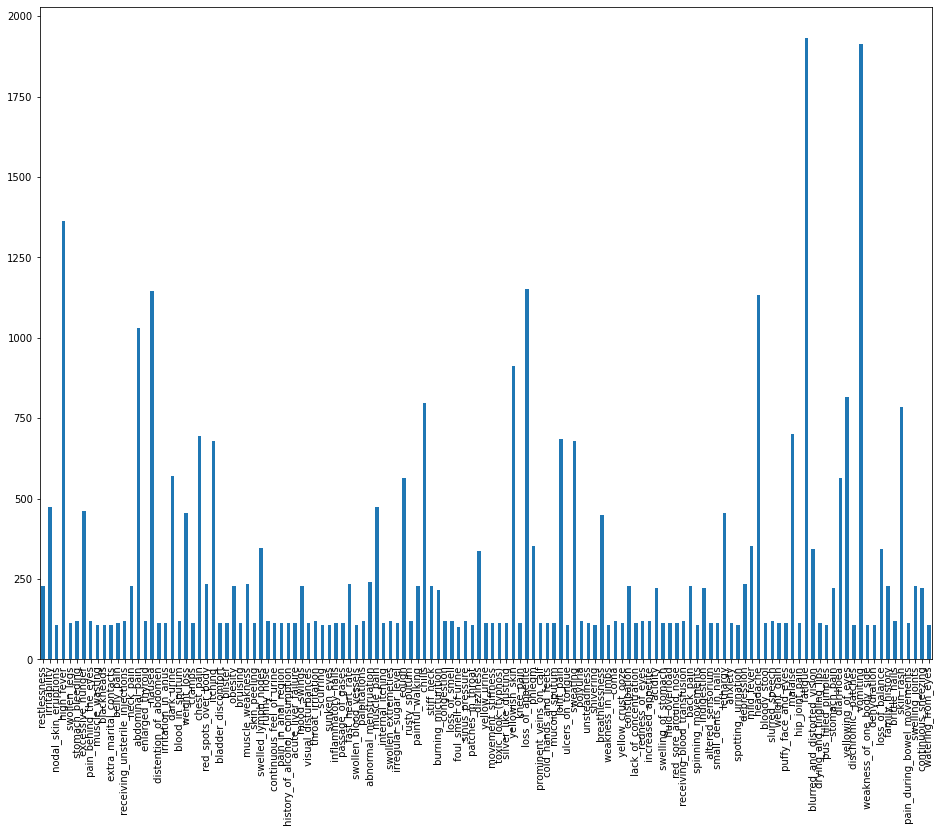

In [9]:
symptoms_count = processed_df.iloc[:,:-1].sum(axis=0)
symptoms_count.plot(kind="bar", figsize=(16,12))

In [10]:
common_symptoms_count = symptoms_count.describe()["25%"]
most_common_symptoms = symptoms_count[symptoms_count > common_symptoms_count]

In [11]:
print(f"There are about {len(most_common_symptoms)} symptoms that are common in the disease")
print(f"The most common symptoms are: {most_common_symptoms.index}")

There are about 71 symptoms that are common in the disease
The most common symptoms are: Index([' restlessness', ' irritability', ' high_fever', ' stomach_bleeding',
       ' excessive_hunger', ' pain_behind_the_eyes',
       ' receiving_unsterile_injections', ' neck_pain', ' abdominal_pain',
       ' enlarged_thyroid', ' nausea', ' dark_urine', ' blood_in_sputum',
       ' weight_loss', ' chest_pain', ' red_spots_over_body', 'itching',
       ' obesity', ' muscle_weakness', ' swelled_lymph_nodes', ' runny_nose',
       ' mood_swings', ' throat_irritation', ' fast_heart_rate',
       ' palpitations', ' abnormal_menstruation', ' muscle_pain',
       ' swollen_extremeties', ' cough', ' rusty_sputum', ' painful_walking',
       ' chills', ' stiff_neck', ' burning_micturition', ' congestion',
       ' loss_of_smell', ' sinus_pressure', ' dizziness', ' yellowish_skin',
       ' loss_of_appetite', ' phlegm', ' joint_pain', ' sweating', ' polyuria',
       ' breathlessness', ' coma', ' consti

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

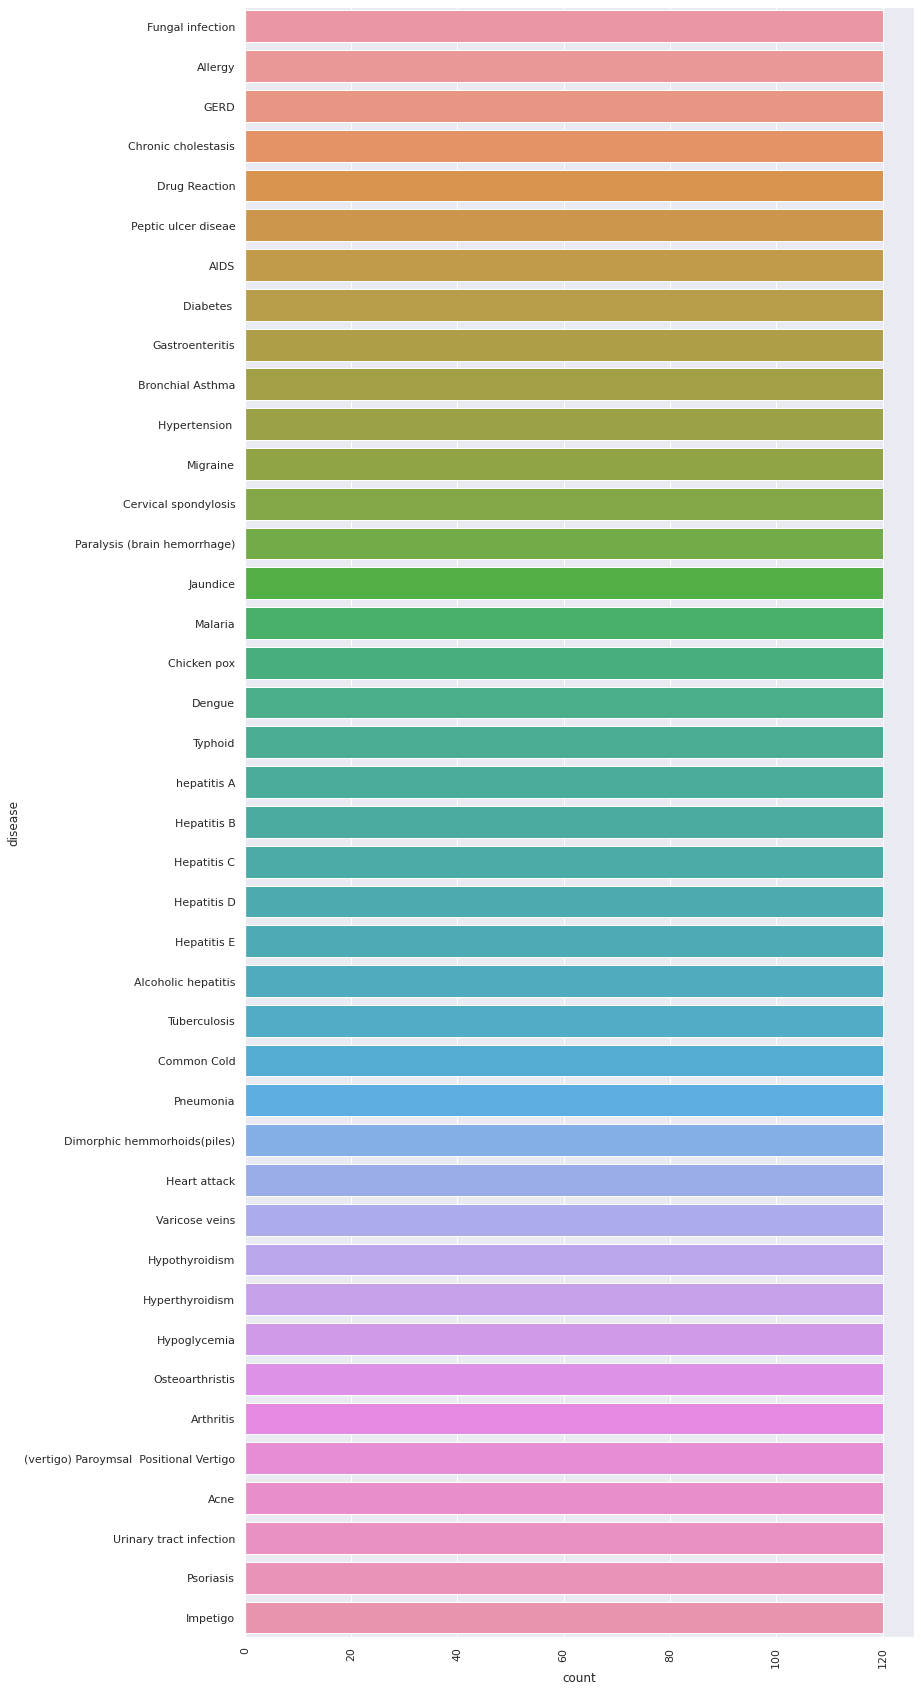

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="disease", data=processed_df)
print(processed_df["disease"].value_counts())

```Spliting the dataset in train and test set in the ratio of 2:1```

In [71]:
from sklearn.model_selection import train_test_split
X=processed_df.drop(["disease"],axis=1)
y=processed_df["disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0,stratify=y)

In [72]:
train_df= X_train
train_df["disease"]=y_train
test_df=X_test
test_df["disease"]=y_test
# X_train.loc[:,processed_df.columns[:-1]] = processed_df.loc[:,processed_df.columns[:-1]].astype('int8')


In [73]:
assert (train_df.shape[1]==test_df.shape[1])

In [74]:
train_df["disease"].unique()
len(train_df["disease"].unique())

41

Heart attack                               81
Jaundice                                   81
Tuberculosis                               81
Osteoarthristis                            81
Dengue                                     81
Migraine                                   81
Malaria                                    81
Common Cold                                81
Urinary tract infection                    81
Hepatitis C                                81
Psoriasis                                  81
Allergy                                    81
Hypoglycemia                               81
Impetigo                                   81
hepatitis A                                81
Acne                                       81
Peptic ulcer diseae                        80
Typhoid                                    80
Hyperthyroidism                            80
Dimorphic hemmorhoids(piles)               80
(vertigo) Paroymsal  Positional Vertigo    80
Hypertension                      

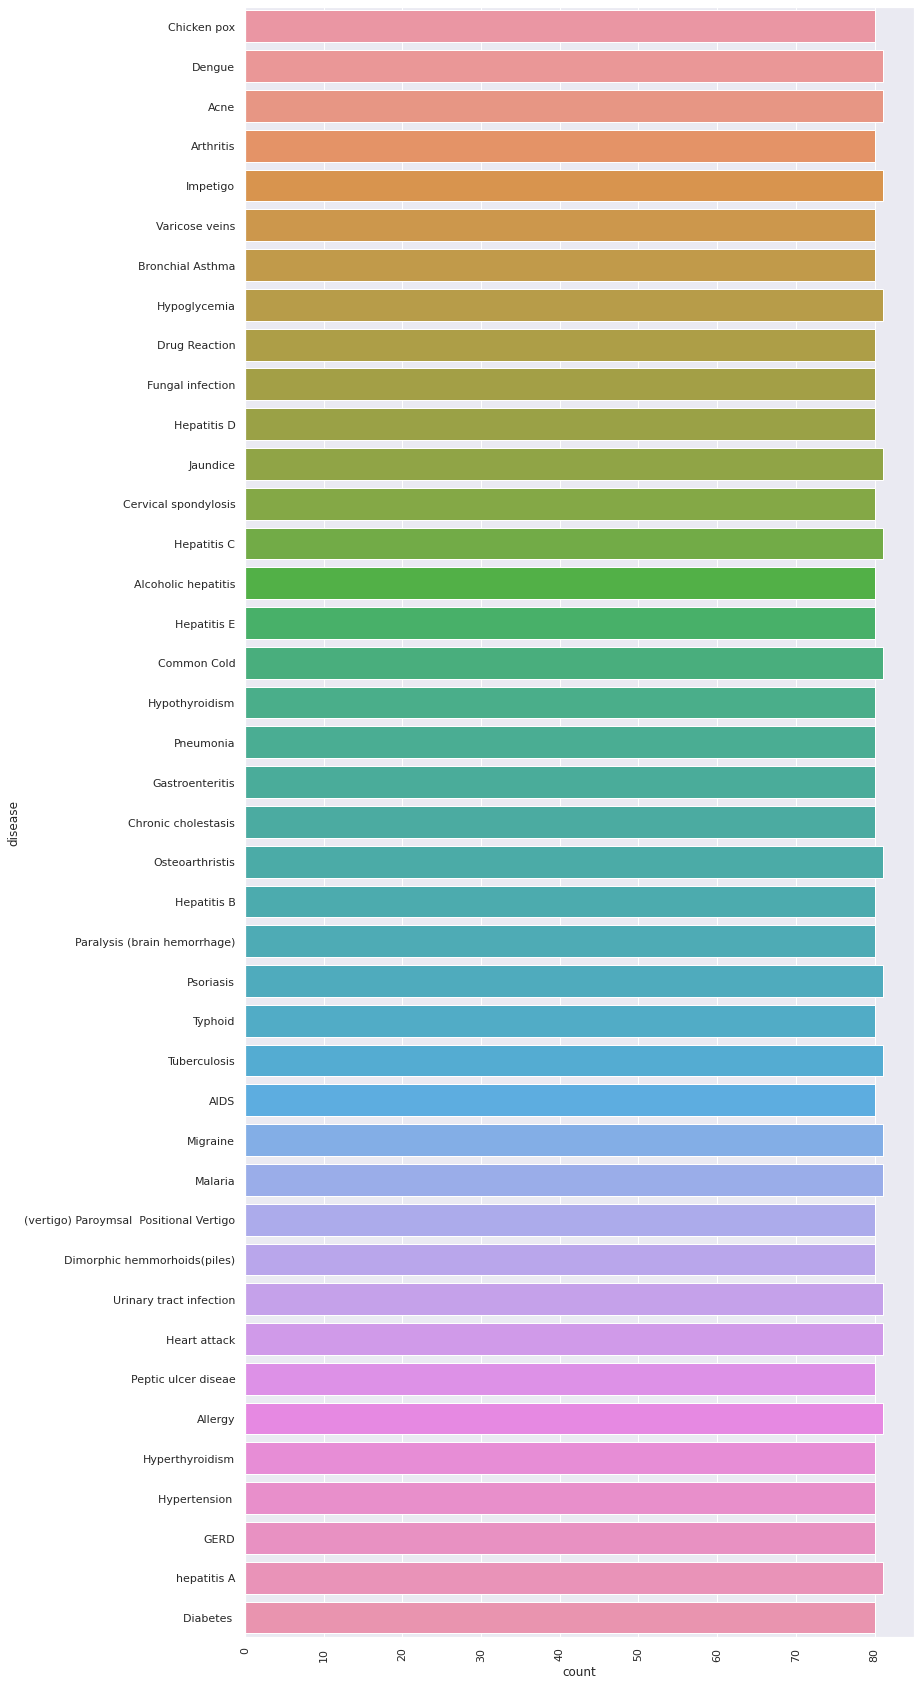

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="disease", data=train_df)
print(train_df["disease"].value_counts())


In [76]:
train_df.head()

,restlessness,irritability,nodal_skin_eruptions,high_fever,swollen_legs,stomach_bleeding,excessive_hunger,pain_behind_the_eyes,muscle_wasting,blackheads,...,dehydration,loss_of_balance,family_history,brittle_nails,skin_rash,pain_during_bowel_movements,swelling_joints,continuous_sneezing,watering_from_eyes,disease
2599,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Chicken pox
1400,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Dengue
780,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,Acne
4709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Arthritis
2043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Impetigo


In [77]:
train_df["itching"].value_counts()

0    2844
1     452
Name: itching, dtype: int64

**The data seems to have balanced entries**

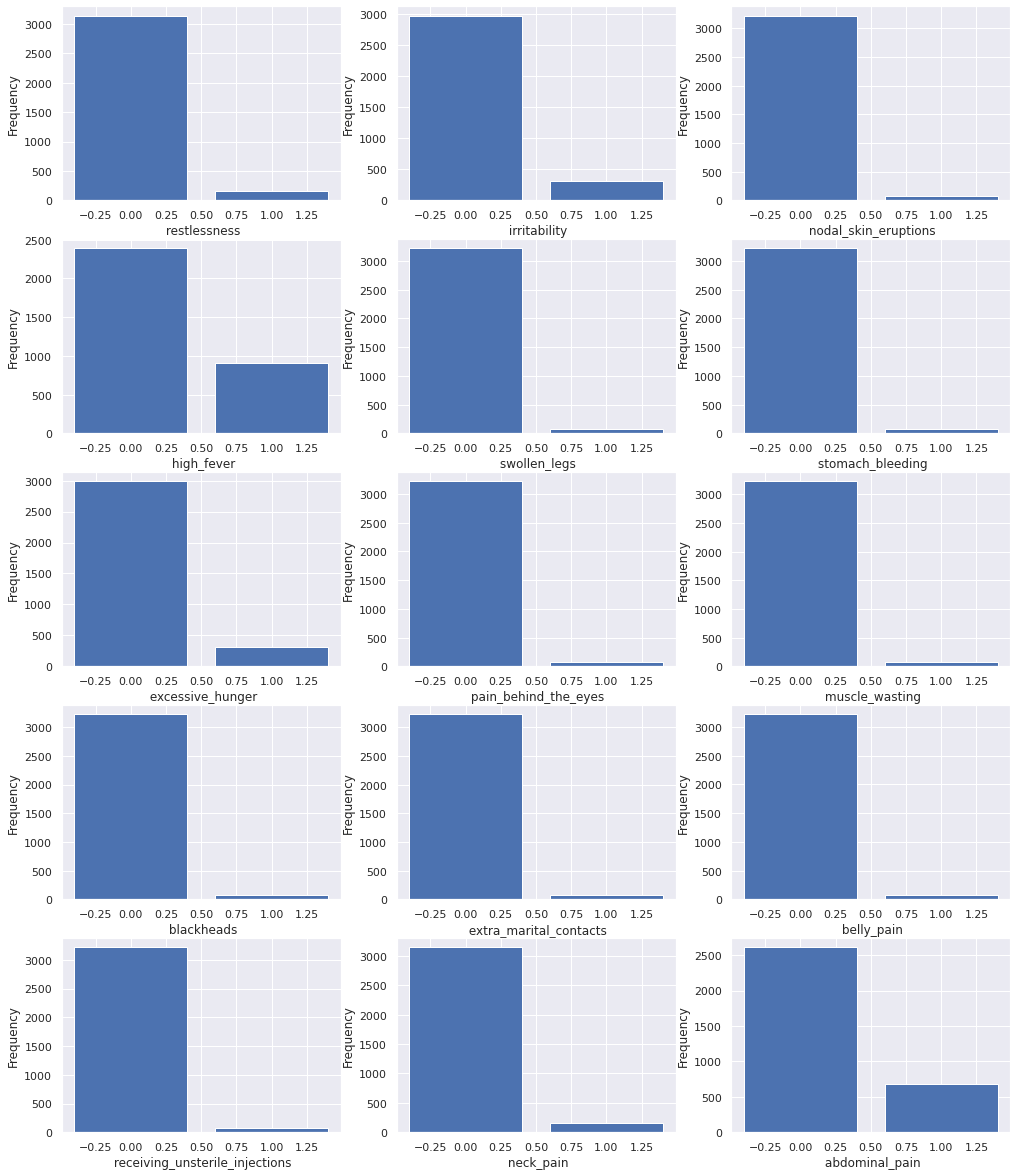

In [78]:
# lets visualize some of features
features = train_df.columns[:15]

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3+1,3,i+1)
    val_cnt = train_df[feature].value_counts()
    plt.bar(val_cnt.index.to_numpy(), val_cnt.values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

In [79]:
# train_df.drop(["index"], axis=1, inplace=True)
train_df.reset_index(drop=True, inplace=True)
df_corr = train_df.corr().abs()
df_corr

,restlessness,irritability,nodal_skin_eruptions,high_fever,swollen_legs,stomach_bleeding,excessive_hunger,pain_behind_the_eyes,muscle_wasting,blackheads,...,weakness_of_one_body_side,dehydration,loss_of_balance,family_history,brittle_nails,skin_rash,pain_during_bowel_movements,swelling_joints,continuous_sneezing,watering_from_eyes
restlessness,1.000000,0.303229,0.032612,0.136827,0.034468,0.034918,0.647703,0.035141,0.033319,0.033551,...,0.033085,0.033551,0.060495,0.049013,0.034918,0.096692,0.033551,0.049180,0.048510,0.032849
irritability,0.303229,1.000000,0.048052,0.201609,0.050787,0.051450,0.702188,0.051778,0.049094,0.049436,...,0.048749,0.049436,0.089136,0.072219,0.483496,0.142472,0.049436,0.072465,0.071478,0.048401
nodal_skin_eruptions,0.032612,0.048052,1.000000,0.091040,0.022934,0.023233,0.047463,0.023381,0.022169,0.022324,...,0.022013,0.022324,0.040251,0.032612,0.023233,0.302850,0.022324,0.032723,0.032277,0.021857
high_fever,0.136827,0.201609,0.091040,1.000000,0.096221,0.233153,0.199137,0.230534,0.229680,0.093663,...,0.092360,0.093663,0.168879,0.097835,0.097477,0.114794,0.093663,0.137293,0.098201,0.091702
swollen_legs,0.034468,0.050787,0.022934,0.096221,1.000000,0.024555,0.050164,0.024712,0.023431,0.023594,...,0.023266,0.023594,0.042542,0.034468,0.024555,0.067997,0.023594,0.034585,0.034114,0.023100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
skin_rash,0.096692,0.142472,0.302850,0.114794,0.067997,0.068884,0.140725,0.336715,0.065730,0.319074,...,0.065268,0.066189,0.119342,0.096692,0.068884,1.000000,0.066189,0.097021,0.095700,0.064803
pain_during_bowel_movements,0.033551,0.049436,0.022324,0.093663,0.023594,0.023902,0.048830,0.024055,0.022808,0.022967,...,0.022648,0.022967,0.041411,0.033551,0.023902,0.066189,1.000000,0.033665,0.033207,0.022486
swelling_joints,0.049180,0.072465,0.032723,0.137293,0.034585,0.035036,0.071576,0.035260,0.033432,0.033665,...,0.033197,0.033665,0.060701,0.049180,0.035036,0.097021,0.033665,1.000000,0.048675,0.032961
continuous_sneezing,0.048510,0.071478,0.032277,0.098201,0.034114,0.034559,0.070602,0.034780,0.032977,0.033207,...,0.032745,0.033207,0.059874,0.048510,0.034559,0.095700,0.033207,0.048675,1.000000,0.617180


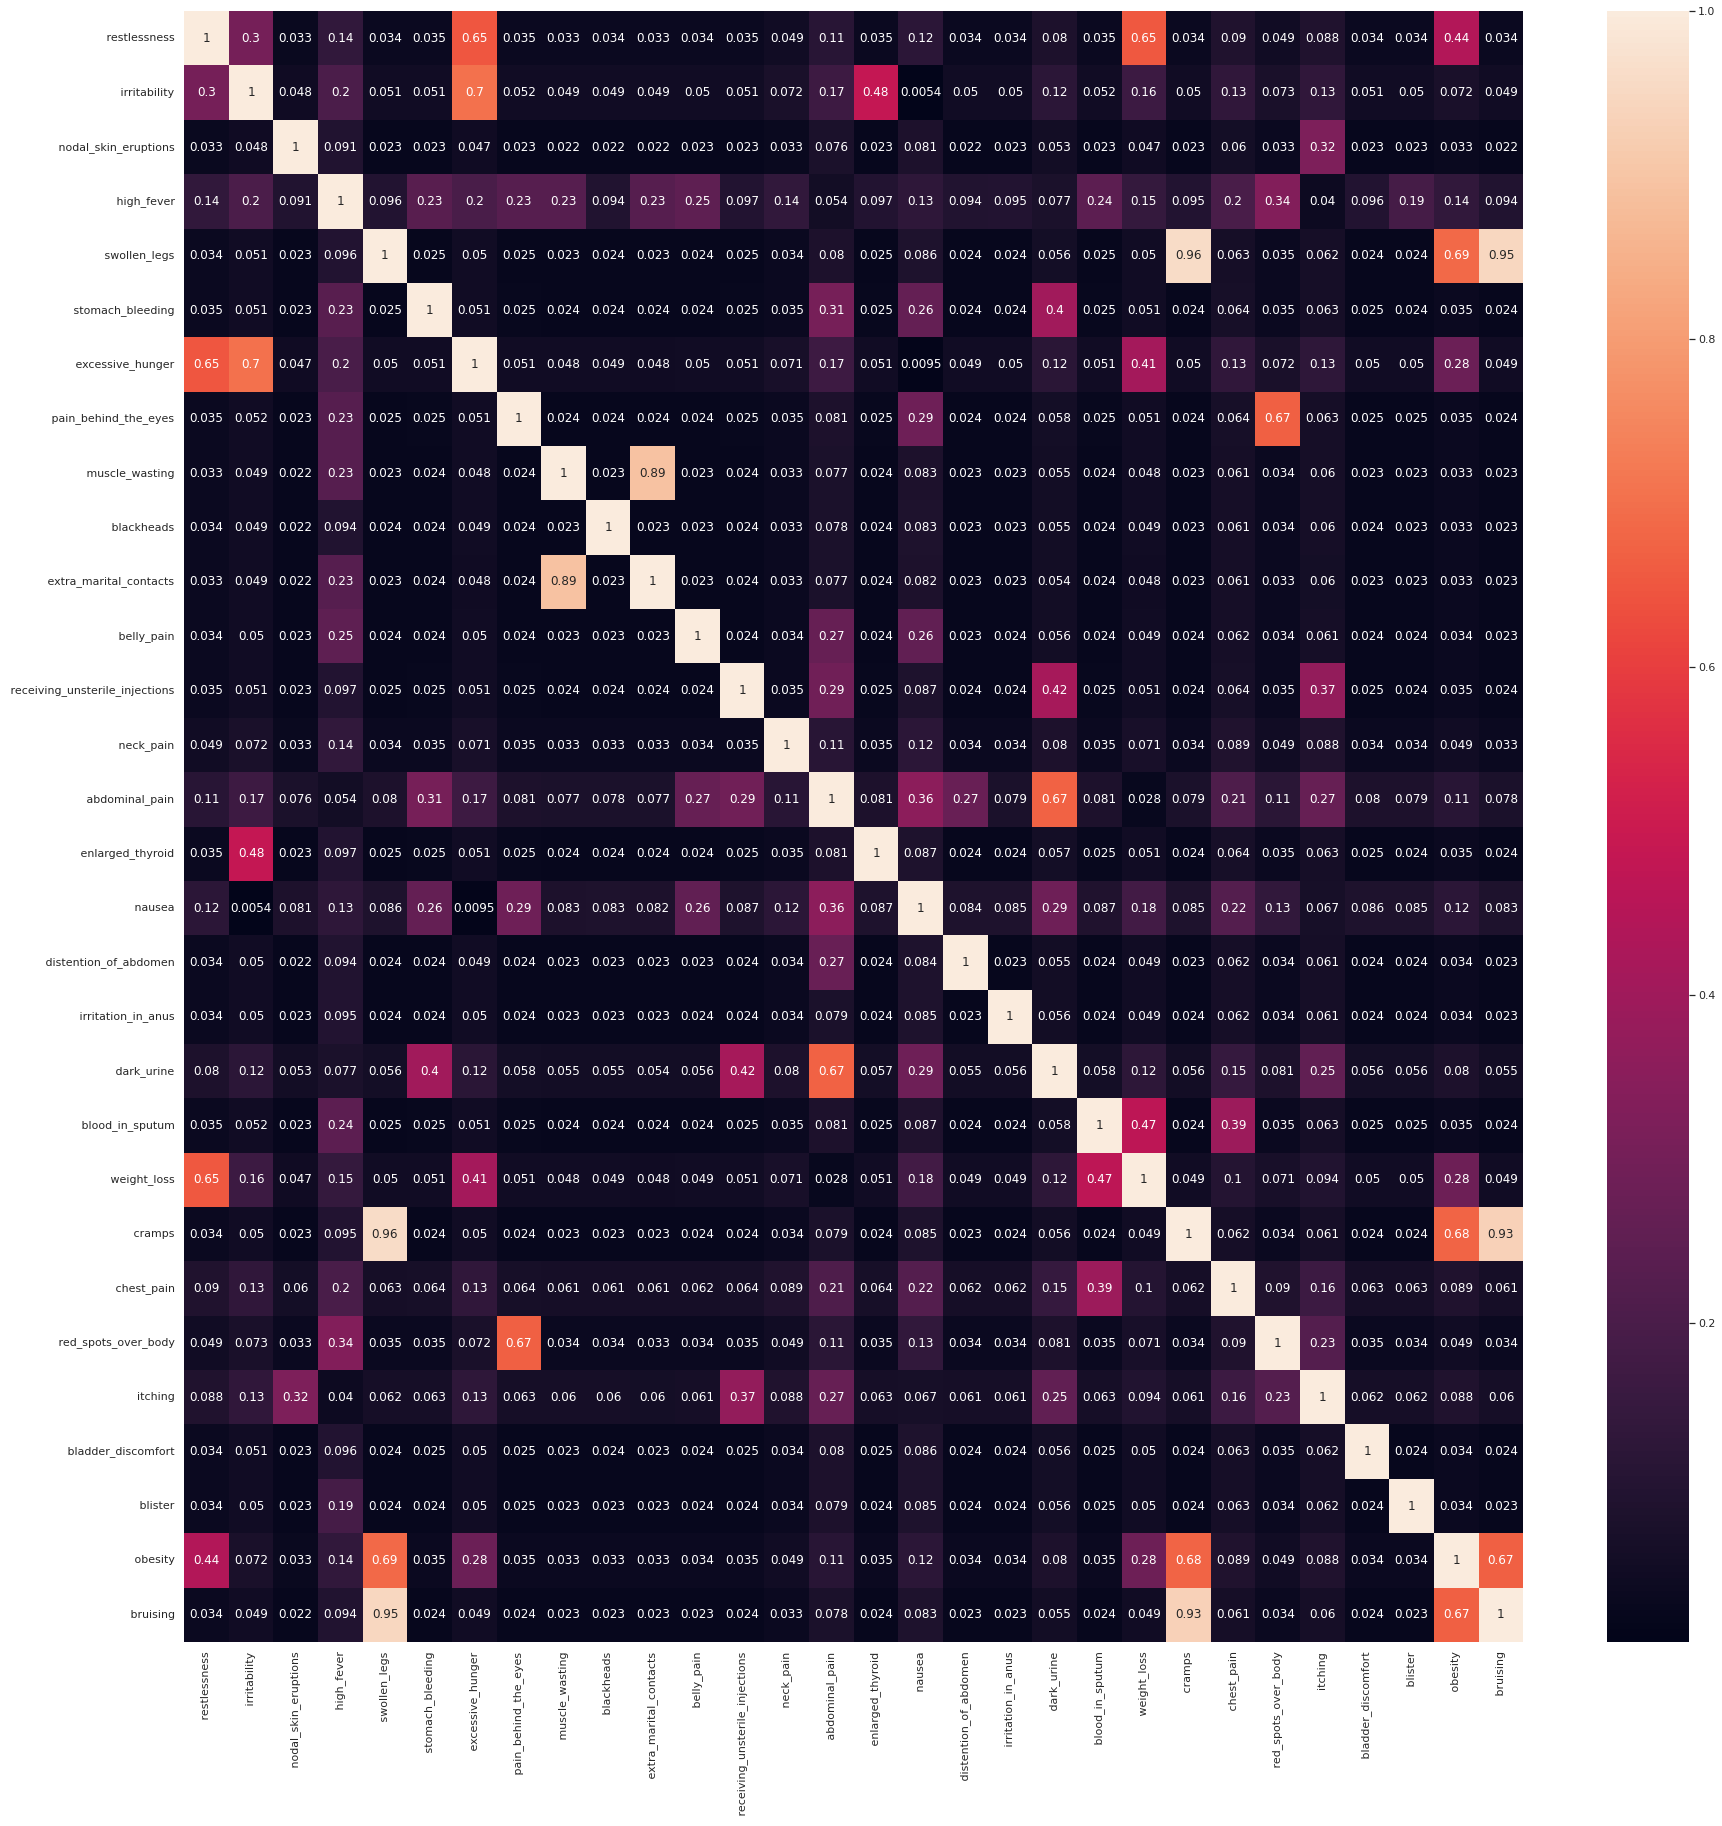

In [80]:

plt.figure(figsize = (30, 30))
sns.heatmap(abs(df_corr.iloc[:30, :30]), annot = True)
plt.show()

<AxesSubplot:>

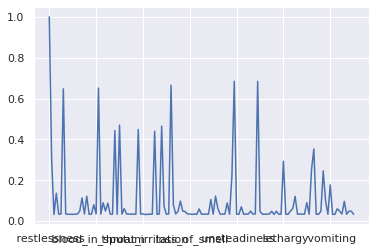

In [81]:
df_corr.iloc[0].plot()

In [82]:
len(X_train.columns)

132

In [84]:
corr_mat =df_corr.corr()
drop_columns=[]
for i,column in enumerate(corr_mat.columns):
  if any(corr_mat[column].iloc[i+1:]>0.7 ):
    drop_columns.append(column)

print(f"The count of extra highly correlated columns : {len(drop_columns)}")


# high_corr={}
# indices = np.array(range(len(corr_mat)))
# for i,column in enumerate(corr_mat.columns):
#     high_corr[column] = indices[corr_mat[column]>0.75]
    

# high_corr
# corr_matrix



The count of extra highly correlated columns : 84


In [85]:
train_df.drop(drop_columns,axis=1,inplace=True)
test_df.drop(drop_columns,axis=1,inplace=True)

# ```Creating a classifier without preprocessing the dataset```

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train.iloc[:,:-1], y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
clf.get_depth()

39

In [88]:
clf.get_n_leaves()

76

In [89]:
clf.feature_names_in_[2]

' red_spots_over_body'

In [90]:
features = clf.feature_importances_<0.002
drop_features = clf.feature_names_in_[features]

In [91]:
from sklearn.metrics import classification_report

pred_y = clf.predict(test_df.loc[:,test_df.columns[:-1]])
print(classification_report(test_df["disease"], pred_y, target_names=test_df["disease"].unique()))

                                         precision    recall  f1-score   support

                            Hepatitis D       1.00      1.00      1.00        40
                Urinary tract infection       1.00      0.93      0.96        40
                          Drug Reaction       0.93      1.00      0.96        39
                               Migraine       1.00      1.00      1.00        40
                            hepatitis A       1.00      1.00      1.00        39
(vertigo) Paroymsal  Positional Vertigo       0.97      0.93      0.95        40
                         Varicose veins       1.00      1.00      1.00        40
                        Gastroenteritis       1.00      1.00      1.00        40
                         Hypothyroidism       1.00      1.00      1.00        40
                                   Acne       1.00      1.00      1.00        40
                       Fungal infection       1.00      1.00      1.00        39
                    Peptic 

In [147]:
from sklearn.metrics import precision_recall_fscore_support

pred_y = clf.predict(test_df.loc[:,test_df.columns[:-1]])
print(precision_recall_fscore_support(test_df["disease"], pred_y, labels=test_df["disease"].unique(), average="macro"))

(0.9916539315769097, 0.990791119449656, 0.9908003437128257, None)


# ```Creating a classifier using preprocessed data```

In [93]:
tdf = train_df.drop(drop_features, axis=1)

In [101]:
tedf = test_df.drop(drop_features, axis=1)

In [124]:
x_train_data, y_train_data = tdf.iloc[:,:-1], tdf["disease"]
x_test_data, y_test_data = tedf.iloc[:,:-1], tedf["disease"]

In [168]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train_data,y_train_data)

DecisionTreeClassifier(random_state=0)

In [126]:
importance_column_index = (classifier.feature_importances_==0)

In [127]:
classifier.get_depth()

39

In [128]:
classifier.feature_importances_

array([0.06128658, 0.0241952 , 0.00499859, 0.02352462, 0.02101835,
       0.02141984, 0.02354   , 0.02391747, 0.04631297, 0.02741636,
       0.01101063, 0.02525167, 0.02427061, 0.02525116, 0.02279555,
       0.02355306, 0.02458221, 0.02525149, 0.02468065, 0.00272611,
       0.00374235, 0.02424795, 0.02481299, 0.03271252, 0.06695323,
       0.01385496, 0.02388384, 0.02239027, 0.01975938, 0.00800399,
       0.05188081, 0.02256174, 0.00697239, 0.02196741, 0.02311788,
       0.0237558 , 0.02420962, 0.02525132, 0.00202907, 0.02308178,
       0.0243945 , 0.02341309])

In [129]:
print(f" Number of columns in train and test set : {len(x_train_data.columns)} & {len(x_test_data.columns)}")

 Number of columns in train and test set : 42 & 42


In [150]:
from sklearn.metrics import classification_report

pred_y = classifier.predict(x_test_data)
print(classification_report(y_test_data, pred_y, target_names=y_test_data.unique()))


                                         precision    recall  f1-score   support

                            Hepatitis D       0.48      0.93      0.63        40
                Urinary tract infection       0.00      0.00      0.00        40
                          Drug Reaction       0.05      1.00      0.09        39
                               Migraine       0.00      0.00      0.00        40
                            hepatitis A       0.00      0.00      0.00        39
(vertigo) Paroymsal  Positional Vertigo       0.97      0.93      0.95        40
                         Varicose veins       1.00      0.95      0.97        40
                        Gastroenteritis       0.00      0.00      0.00        40
                         Hypothyroidism       1.00      1.00      1.00        40
                                   Acne       1.00      0.90      0.95        40
                       Fungal infection       0.00      0.00      0.00        39
                    Peptic 

/home/aayush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aayush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aayush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
from sklearn.metrics import precision_recall_fscore_support

pred_y = classifier.predict(x_test_data)
print(precision_recall_fscore_support(y_test_data, pred_y, labels=y_test_data.unique(), average="macro"))

(0.989167083179014, 0.9870387742338962, 0.9872579511460429, None)


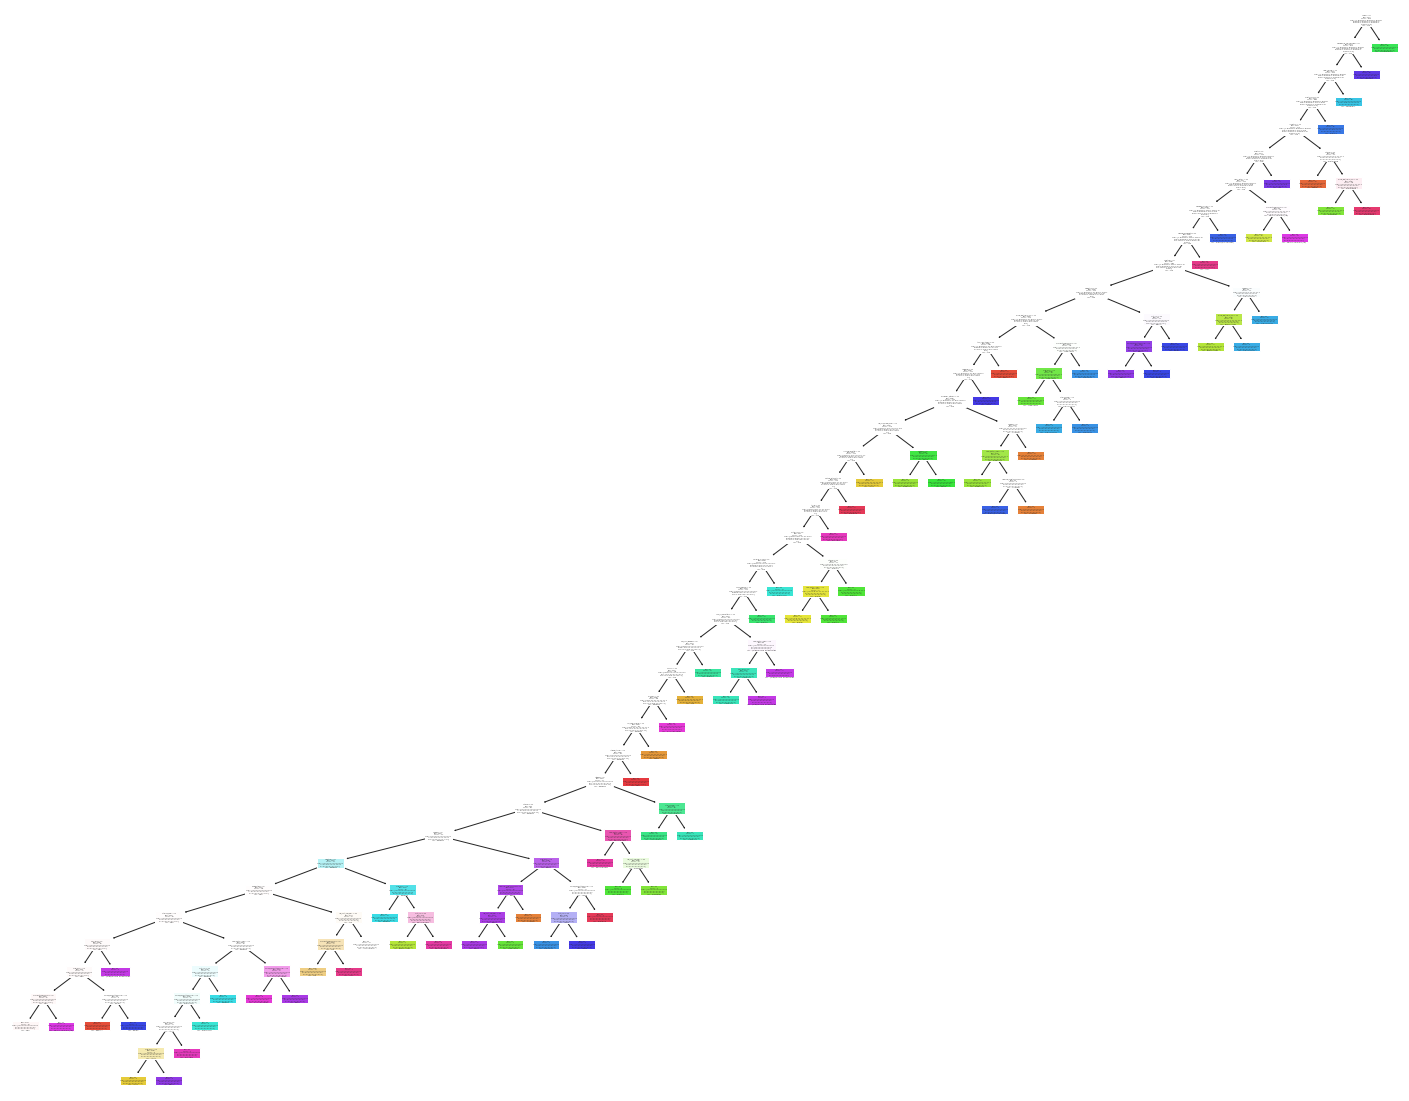

In [132]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [134]:
import joblib

joblib.dump(classifier, "DecisionTree")

['DecisionTree']

# ```Random Forest Classifier```

In [170]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=5, random_state=0)
classifier1.fit(x_train_data, y_train_data)

RandomForestClassifier(max_depth=5, random_state=0)

In [171]:
from sklearn.metrics import precision_recall_fscore_support

pred_y = classifier1.predict(x_test_data)
print(precision_recall_fscore_support(y_test_data, pred_y, labels=y_test_data.unique(), average="macro"))

(0.98497635870362, 0.9801907442151343, 0.9809999789031988, None)


In [172]:
joblib.dump(classifier1, "RandomForest")

['RandomForest']

# ```Naive Bayes Classifier```

In [174]:
from sklearn.naive_bayes import GaussianNB

classifier2 = GaussianNB()
classifier2.fit(x_train_data, y_train_data)

GaussianNB()

In [175]:
from sklearn.metrics import precision_recall_fscore_support

pred_y = classifier2.predict(x_test_data)
print(precision_recall_fscore_support(y_test_data, pred_y, labels=test_df["disease"].unique(), average="macro"))

(0.989167083179014, 0.9870387742338962, 0.9872579511460429, None)


In [176]:
joblib.dump(classifier2, "NaiveBayes")

['NaiveBayes']

# ```K Nearest Neighbour classifier```

In [189]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=2)
classifier3.fit(x_train_data,y_train_data)

KNeighborsClassifier(n_neighbors=2)

In [190]:
pred_y = classifier3.predict(x_test_data)
print(precision_recall_fscore_support(y_test_data, pred_y, labels=test_df["disease"].unique(), average="macro"))

(0.9879784265822954, 0.9838649155722328, 0.9844934682421872, None)


In [191]:
joblib.dump(classifier3, "KNN")

['KNN']

# ```Logistic Regression```

In [196]:
from sklearn.linear_model import LogisticRegression

classifier4 = LogisticRegression(random_state=0)
classifier4.fit(x_train_data, y_train_data)

LogisticRegression(random_state=0)

In [208]:
classifier4.predict([x_test_data.iloc[0,:]])[0]

/home/aayush/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Hepatitis D'

In [202]:
classifier4.predict(x_test_data)

array(['Hepatitis D', 'Urinary tract infection', 'Drug Reaction', ...,
       'Heart attack', 'Varicose veins', 'Peptic ulcer diseae'],
      dtype=object)

In [197]:
from sklearn.metrics import precision_recall_fscore_support

pred_y = classifier4.predict(x_test_data)
print(precision_recall_fscore_support(y_test_data, pred_y, labels=y_test_data.unique(), average="macro"))

(0.989167083179014, 0.9870387742338962, 0.9872579511460429, None)


In [198]:
joblib.dump(classifier4, "LogisticRegression")

['LogisticRegression']

In [1]:
x_test_data.iloc[0,:]

NameError: name 'x_test_data' is not defined